In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
print(data.head())

   Age          Eduacation      Race         Hisp MaritalStatus  Nodeg  \
0   45  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
1   21        Intermediate  NotBlack  NotHispanic    NotMarried      0   
2   38          HighSchool  NotBlack  NotHispanic       Married      0   
3   48  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
4   18  LessThanHighSchool  NotBlack  NotHispanic       Married      1   

   Earnings_1974  Earnings_1975  Earnings_1978  
0      21516.670      25243.550      25564.670  
1       3175.971       5852.565      13496.080  
2      23039.020      25130.760      25564.670  
3      24994.370      25243.550      25564.670  
4       1669.295      10727.610       9860.869  


In [ ]:
label_encoder = LabelEncoder()
data['Education'] = label_encoder.fit_transform(data['Eduacation'])
data['Race'] = label_encoder.fit_transform(data['Race'])
data['Hisp'] = label_encoder.fit_transform(data['Hisp'])
data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])

In [ ]:
X = data[['Age', 'Education', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg', 'Earnings_1974', 'Earnings_1975']]
y = data['Earnings_1978']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Figure size 1000x800 with 0 Axes>

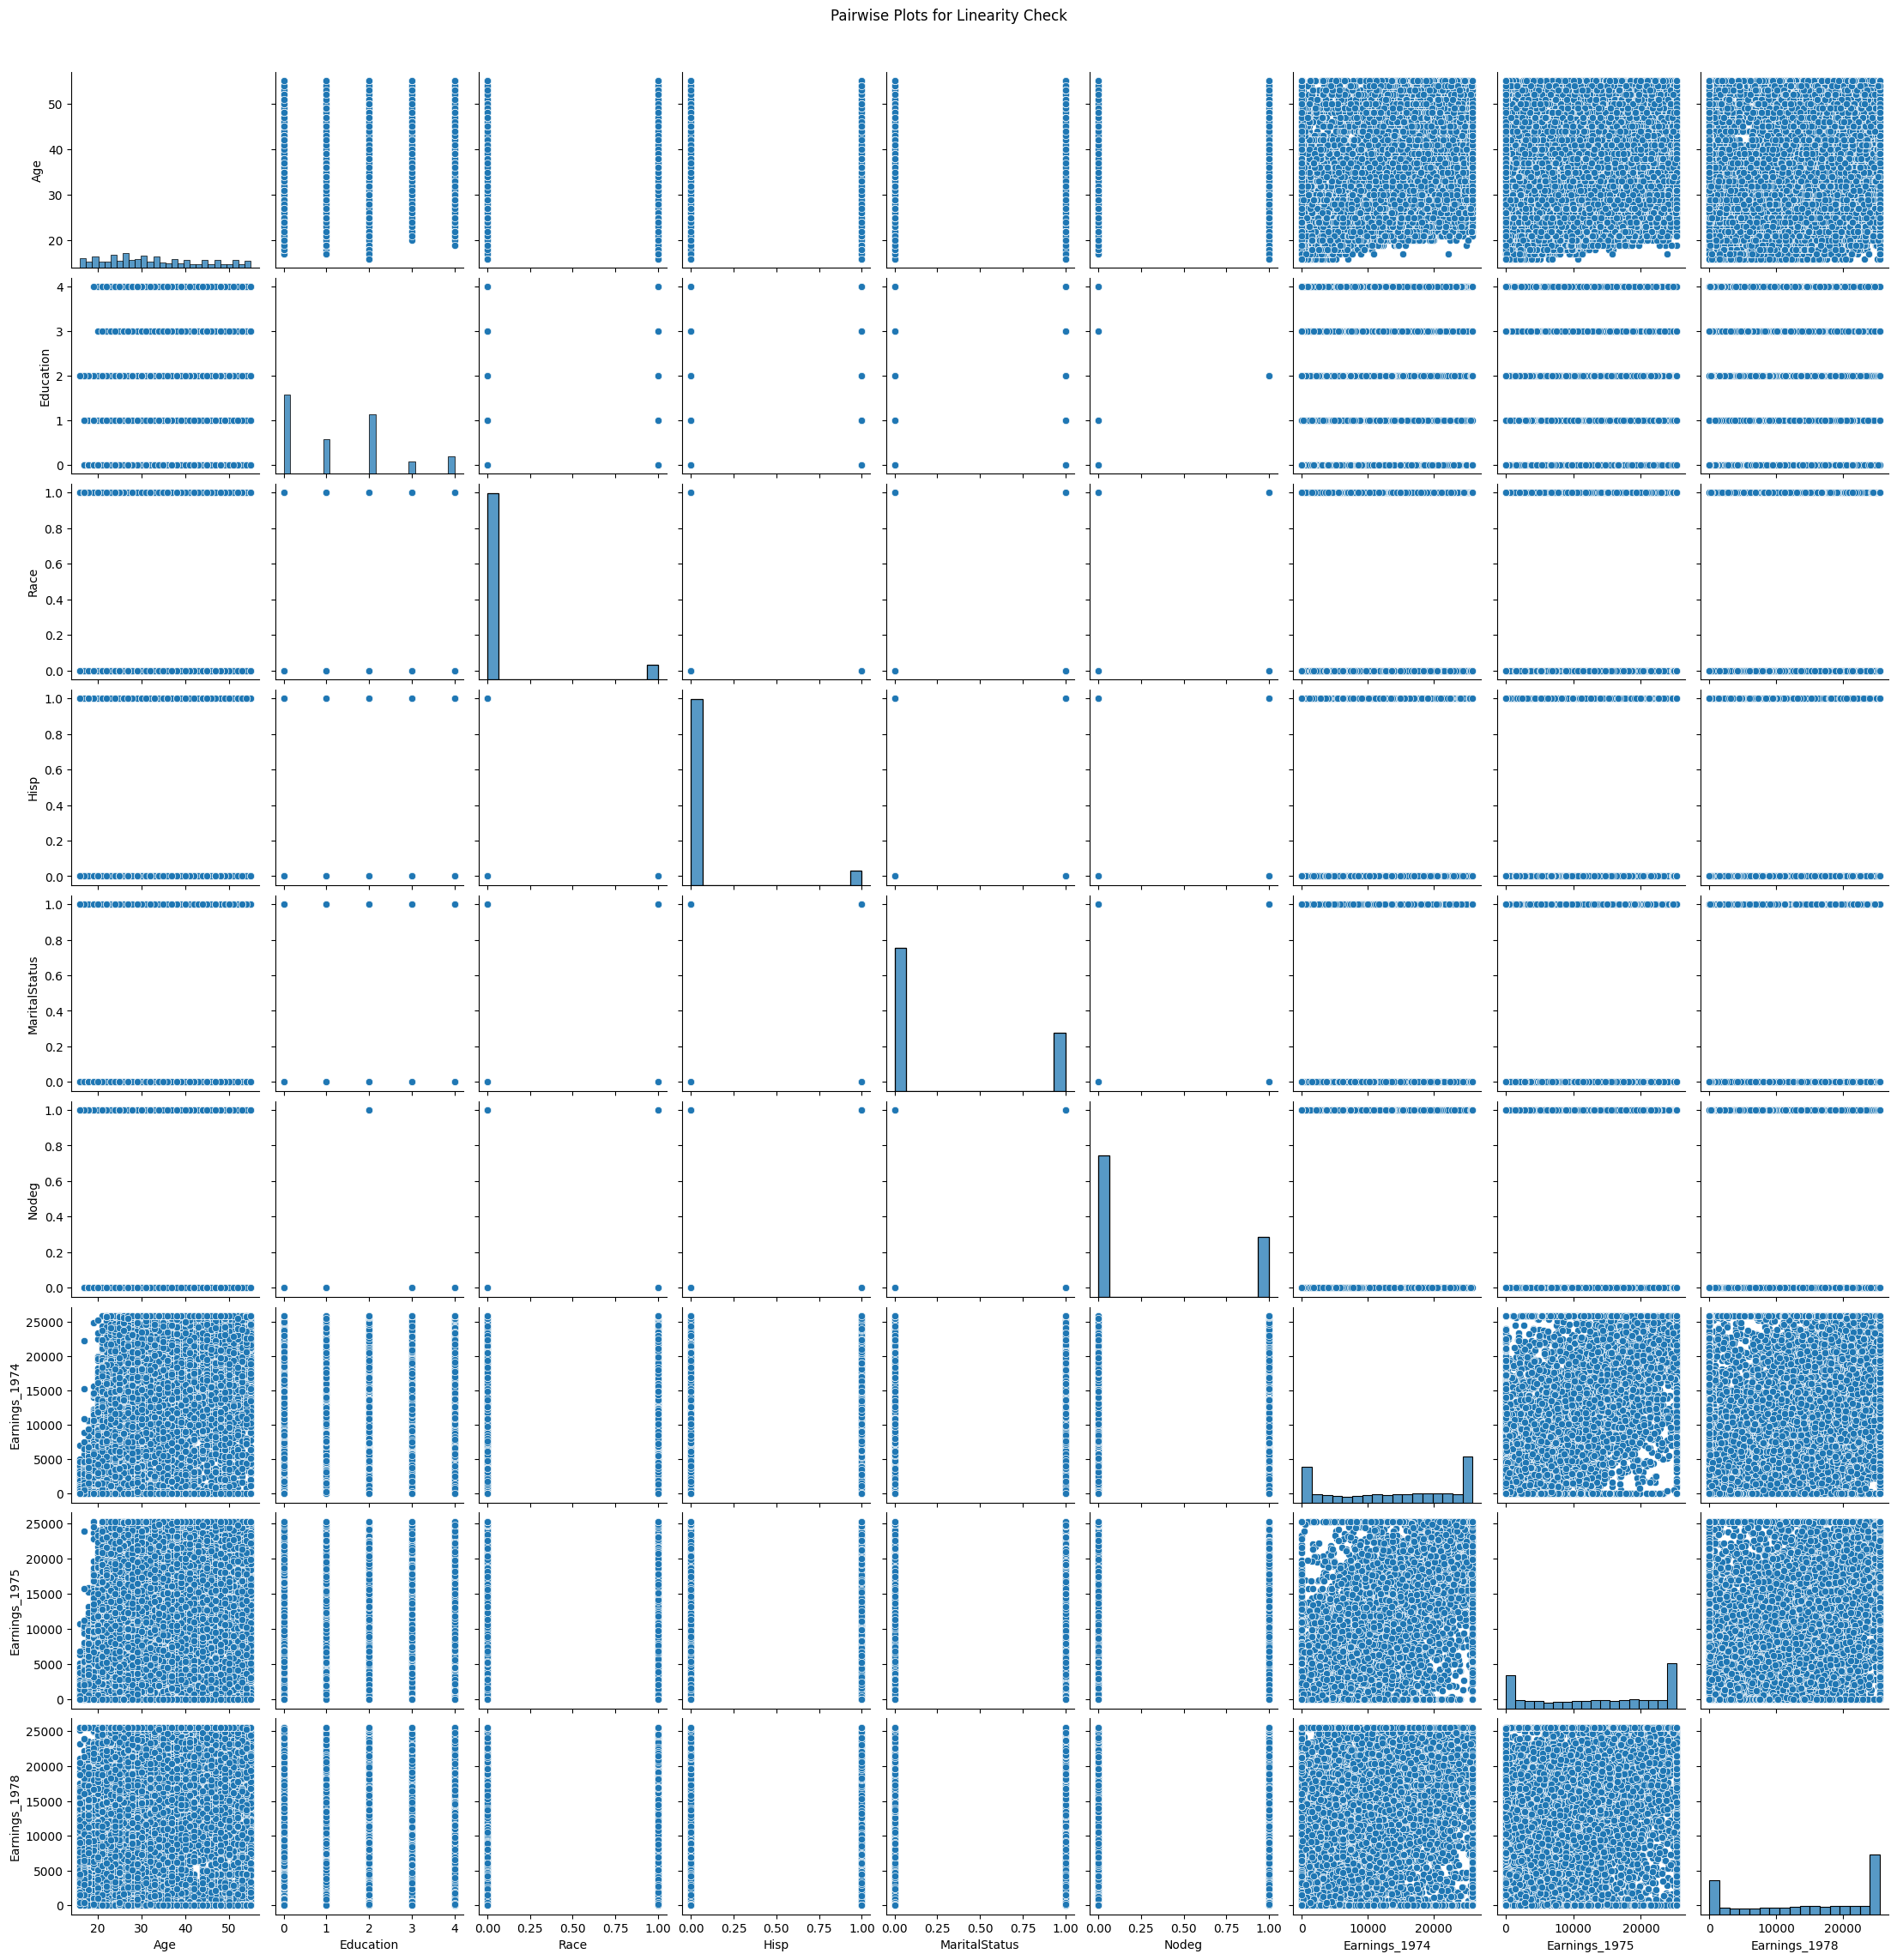

In [ ]:
# 1. Check Linearity (using a scatter plot and correlation matrix)
plt.figure(figsize=(10, 8))
sns.pairplot(pd.concat([X, y], axis=1))
plt.suptitle("Pairwise Plots for Linearity Check", y=1.02)
plt.show()

In [ ]:
# 2. Check for Independence of Residuals (using Durbin-Watson test)
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
durbin_watson = sm.stats.stattools.durbin_watson(model.resid)
print(f"Durbin-Watson Statistic: {durbin_watson}")

Durbin-Watson Statistic: 2.0070129787776305


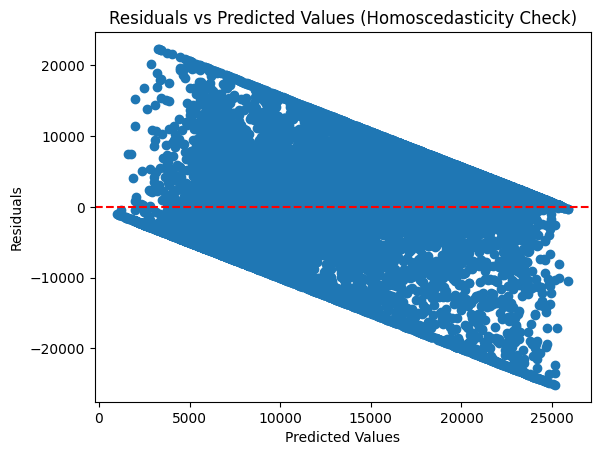

In [ ]:
# 3. Check for Homoscedasticity (using residual plot)
y_train_pred = model.predict(sm.add_constant(X_train))
residuals = y_train - y_train_pred
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Homoscedasticity Check)")
plt.show()

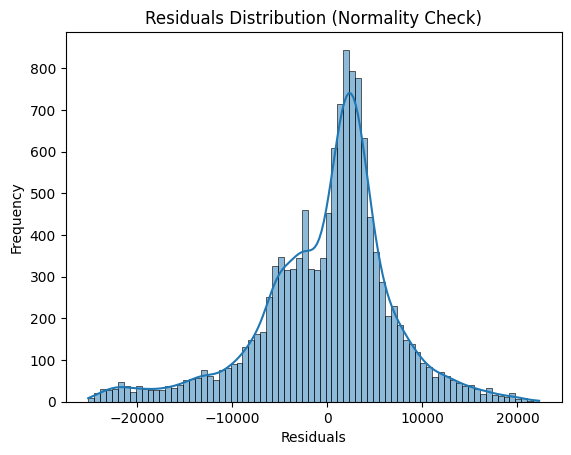

In [ ]:
# 4. Check for Normality of Residuals (using histogram and Shapiro-Wilk test)
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution (Normality Check)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test for Normality of Residuals: p-value = {shapiro_test.pvalue}")


Shapiro-Wilk Test for Normality of Residuals: p-value = 1.8788573691846056e-51


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12793.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# 5. Check for Multicollinearity (using Variance Inflation Factor - VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Variance Inflation Factor (VIF) for Multicollinearity Check:")
print(vif_data)

Variance Inflation Factor (VIF) for Multicollinearity Check:
         Feature        VIF
0            Age   5.580414
1      Education   2.250858
2           Race   1.098690
3           Hisp   1.105450
4  MaritalStatus   1.294160
5          Nodeg   1.776641
6  Earnings_1974  13.845885
7  Earnings_1975  12.989897


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 48625781.822785094
R-squared: 0.4767134214511377
